# Analyzing Adoption and Death Rates of Dogs at Sonoma County Animal Shelter

Khushi Sharma and Nyra Usi - 04/15/2022

# Introduction

We examine tens of thousands of data about the animals in Sonoma County Animal Services. More specifically, we observe what affects adoption, give-up (meaning the owner surrendered a dog or returned an adopted dog), and death rates for dogs at Sonoma County Animal Services. For adoption and give-up rates, we find the relation between those rates and time (months), biological data (sex, size, age, and health), and COVID-19. For death, we find the relation between those rates and biological data (age and health) on intake, time(duration of stay), adoption rates, and COVID-19. 

All of the information above is found on a dataset on the website, data.sonomacounty.ca.gov. The data details animals (their identification and biological data) and their situations coming in and out of Sonoma County Animal Services (their intake/outcome condition, location, and type). The County of Sonoma Department of Health Services provides the data for the dataset and the dataset was originally created on February 2, 2017 and has been updated daily since.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inital Data Exploration

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-12-2022.csv')

Here we explore and answer questions about the initial data.

For example, how big is the data? Essentially, how many rows and columns are there? 

And what are the types of the columns?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22108 entries, 0 to 22107
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  16406 non-null  object 
 1   Type                  22108 non-null  object 
 2   Breed                 22108 non-null  object 
 3   Color                 22108 non-null  object 
 4   Sex                   22108 non-null  object 
 5   Size                  22075 non-null  object 
 6   Date Of Birth         16709 non-null  object 
 7   Impound Number        22108 non-null  object 
 8   Kennel Number         22099 non-null  object 
 9   Animal ID             22108 non-null  object 
 10  Intake Date           22108 non-null  object 
 11  Outcome Date          21972 non-null  object 
 12  Days in Shelter       22108 non-null  int64  
 13  Intake Type           22108 non-null  object 
 14  Intake Subtype        22108 non-null  object 
 15  Outcome Type       

There are 22108 entries/rows and 24 columns. Of those 24 columns, 21 are object type, 2 are int type, and 1 is float type. 

The columns with int type are 'Days in Shelter' and 'Count'.
The column with float type is 'Outcome Zip Code'. We mark this as an anomaly because arithmetic is not done on zip codes and zip codes do not usually have decimals. We think this column would be better suited as an object type.

The rest of the columns are object type.



What does a typical data entry look like?

In [4]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,REMY,DOG,BEAGLE,BLACK/WHITE,Female,MED,04/11/2014,K21-039564,DS69,A406645,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,*RONDE,DOG,CHIHUAHUA SH,TAN,Neutered,SMALL,07/24/2020,K21-039133,DA30,A406003,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1
2,*SNOOP,CAT,DOMESTIC SH,GRAY,Neutered,SMALL,08/04/2019,K21-039232,CA02,A406151,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,10/27/2020,K21-037796,CA03,A402286,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,01/16/2018,K21-037709,CS05,A402139,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1


A typical data entry begins with the name of the animal. After that follows the animal's bio which contains type, breed, color, sex, size, and date of birth.

Next comes the identification and kennel location of the animal which consists of the impound number and animal ID.

The shelter then takes note on the duration of the stay of the animal as well as its condition (healthy/unhealthy) when it came in and reasoning for coming, and its condition when it was taken out of the shelter and reasoning for its exit.

Lastly, the shelter notes the jurisdication held accountable for the animal's intake as well as information about where the animal was sent to after its stay at the shelter.

There is one final column called 'Count' that is said to be used for arithmetic and group creation. There is no correlation seen for why entries will be marked with either a 1 or a 0 for this column.

For the numerical columns, what are the averages, minimums, and maximums. Are there any outliers?

In [5]:
df['Days in Shelter'].describe()

count    22108.000000
mean        17.515108
std         34.420140
min          0.000000
25%          1.000000
50%          8.000000
75%         22.000000
max       1239.000000
Name: Days in Shelter, dtype: float64

Though there are 3 numerical columns, we ignore the summary information on 'Outcome Zip Code' as zip code is for classifying purposes only rather than arithmetic purposes. We also ignore the summary information on 'Count' as there is no observed relationships in its values. 

On average, animals spend 17 days in the shelter. The minimum days spent in a shelter is 0 days. We assume this is because the animals were only in the shelter for less than 24 hours. The maximum days spent for an animal was 1239 days or around 3 years.

3 years is definitely an outlier, so we examine what this special case was.

In [6]:
df[['Type', 'Kennel Number', 'Outcome Type', 'Outcome Subtype', 'Intake Condition', 'Outcome Condition']][df['Days in Shelter'] == 1239]

,Type,Kennel Number,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition
829,DOG,FREEZER,DISPOSAL,DOA,UNKNOWN,DEAD


The outlier was a dog who was 'DOA' or 'Dead On Arrival' and we can assume that its long stay was due to it being stored in a freezer before final disposal.

What are the number of different values for each column?

In [7]:
df.nunique().sort_values(ascending=False)

Impound Number          22108
Animal ID               19994
Name                     6080
Date Of Birth            5223
Intake Date              2771
Outcome Date             2449
Breed                     977
Location                  635
Outcome Zip Code          635
Color                     327
Days in Shelter           262
Outcome Subtype           227
Kennel Number             162
Intake Subtype             29
Intake Jurisdiction        13
Outcome Jurisdiction       12
Outcome Type                9
Intake Type                 7
Size                        7
Outcome Condition           6
Intake Condition            5
Sex                         5
Type                        3
Count                       2
dtype: int64

As expected the columns involving unique identification or dates have the most different values. 

Breed and color are high as well as there are multidudes of those. Other biological data such as size and sex are in the expected range as there are not too many variations of either of those.

What are the typical values for the biological data of an animal (not breed or color) and their intake/outcome condition and type?

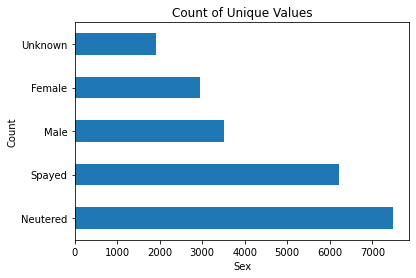

In [8]:
df['Sex'].value_counts().plot.barh()
plt.title('Count of Unique Values')
plt.ylabel('Count')
plt.xlabel('Sex');

These values are a bit surprising as we didn't think there would be only 'UNKNOWN', 'MALE' and 'FEMALE', but they seemed to have added their neutered/spayed status as well.

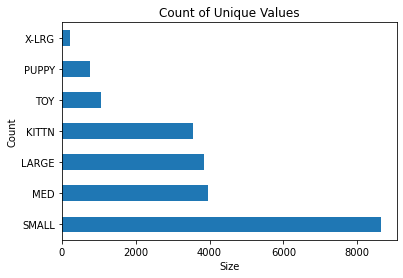

In [9]:
df['Size'].value_counts().plot.barh()
plt.title('Count of Unique Values')
plt.ylabel('Count')
plt.xlabel('Size');

Some of these values are surprising as well as 'TOY', 'PUPPY' and 'KITTN' are not usual size indicators such as 'MED' and 'LARGE'.

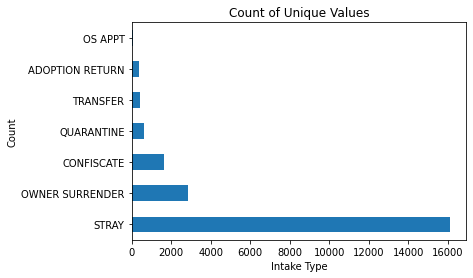

In [10]:
df['Intake Type'].value_counts().plot.barh()
plt.title('Count of Unique Values')
plt.ylabel('Count')
plt.xlabel('Intake Type');

The only value that stands out is 'OS APPT' as we can infer that it is some type of appointment, but we are given no clues to what 'OS' could mean.

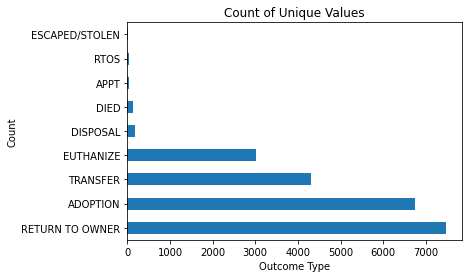

In [11]:
df['Outcome Type'].value_counts().plot.barh()
plt.title('Count of Unique Values')
plt.ylabel('Count')
plt.xlabel('Outcome Type');

The only value that stands out is 'RTOS' as we are given no clues to what it could mean.

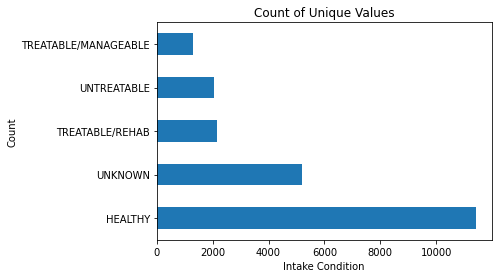

In [12]:
df['Intake Condition'].value_counts().plot.barh()
plt.title('Count of Unique Values')
plt.ylabel('Count')
plt.xlabel('Intake Condition');

It is interesting that they've categorized what kind of 'TREATABLE' a dog is such as 'TREATABLE/MANAGEABLE' and 'TREATABLE/REHAB'.

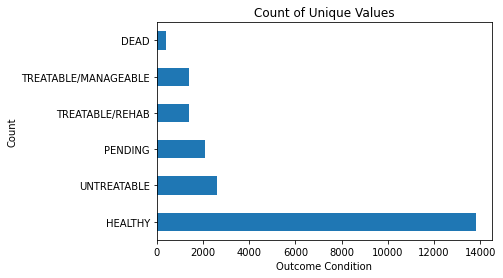

In [13]:
df['Outcome Condition'].value_counts().plot.barh()
plt.title('Count of Unique Values')
plt.ylabel('Count')
plt.xlabel('Outcome Condition');

These values are expected and 'DEATH' is expected as well as dogs could die in the shelter.

# Data Cleaning and Preprocessing

Our main purpose focuses on dogs. Because of that, we drop all rows that are non-dogs. 

In [14]:
df.drop(df[df['Type'] != 'DOG'].index, inplace = True)

For our questions, we look at the columns with dates the dogs were taken in and out of the shelter, their duration of stay, their condition on intake and when taken out, their reasoning for the intake and outcome, as well as their bio data (date of birth, sex, and size).



Because of our initial exploration, we don't include bio data that involves breed and color as we saw there were hundreds of different specific values which make it difficult to graph in a way that's easy to understand. 

Breed, color, and all other columns not mentioned in our desired use are not needed and thus will be dropped.

In [15]:
df.drop(labels=['Name', 'Breed', 'Color', 'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Subtype', 'Outcome Subtype', 'Intake Jurisdiction', 'Outcome Jurisdiction', 'Outcome Zip Code', 'Location', 'Count'], axis=1, inplace=True)


After the initial dropping, we check if there's additional dropping or imputing that needs to happen with the columns we will definitely use in our analysis.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12454 entries, 0 to 22106
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               12454 non-null  object
 1   Sex                12454 non-null  object
 2   Size               12423 non-null  object
 3   Date Of Birth      10377 non-null  object
 4   Intake Date        12454 non-null  object
 5   Outcome Date       12379 non-null  object
 6   Days in Shelter    12454 non-null  int64 
 7   Intake Type        12454 non-null  object
 8   Outcome Type       12379 non-null  object
 9   Intake Condition   12454 non-null  object
 10  Outcome Condition  12278 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


There are null values in the 'Size', 'Date of Birth', 'Outcome Date', 'Outcome Type', and 'Outcome Condition' columns.

Because size, date, outcome condition of birth can vary greatly from dog to dog, we will drop these null rows rather than impute them.

As there can be many different specific values for a dog's outcome type, we drop these null rows rather than impute them as well.

In [17]:
df.dropna(inplace=True)

Though we drop all the null values, there could still be values that are supposed to be null but are labelled as 'NA', etc.

From our initial exploration, the only possible missing and/or bad data are the 'UNKNOWN' values in the 'Sex' and 'Intake Condition' column.

However, given the context that some animals are kept for less than a day, it could be possible the shelter staff was not given enough time to evaluate the dog's sex or condition.

Thus, these 'UNKNOWN' values are valid and will be left alone.

Because we are interested in time, we will be converting the date columns to Timestamp type.

In [18]:
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])
df['Intake Date'] = pd.to_datetime(df['Intake Date'])
df['Outcome Date'] = pd.to_datetime(df['Outcome Date'])

Because we are interested in health in terms of 'HEALTHY' and 'UNHEALTHY', we generalize the values in the condition columns to fit these two generally.

The 'HEALTHY' value will be left alone.
'TREATABLE/MANAGEABLE', 'TREATABLE/REHAB', 'UNTREATABLE' are now labeled as 'UNHEALTHY'.

There are some exceptions to this rule such as 'PENDING', 'UNKNOWN' and 'DEAD' and so these will be left alone as they are special cases that can't be easily categorized to the 'HEALTHY' and 'UNHEALTHY' bins.

In [19]:
replace_conditions = {'TREATABLE/MANAGEABLE': 'UNHEALTHY', 'TREATABLE/REHAB': 'UNHEALTHY', 'UNTREATABLE': 'UNHEALTHY'}
df['Intake Condition'].replace(replace_conditions, inplace=True)
df['Outcome Condition'].replace(replace_conditions, inplace=True)

Since some of our questions deal with the age of the dog, the date of birth is difficult to interpret fast. To go about this, we create a new column called 'Age' which will give the number of years each dog has lived until 4/15/2022.

In [20]:
df['Age'] = (pd.to_datetime('04/15/2022') - df['Date Of Birth']).dt.days // 365
df[['Date Of Birth', 'Age']].head()

,Date Of Birth,Age
0,2014-04-11,8
1,2020-07-24,1
7,2020-01-04,2
8,2020-04-14,2
13,2008-02-06,14


Last in our preprocessing, some of our questions deal with months. The intake and outcome dates are difficult to interpret the month fast. Again, to go about this, we create new columns called 'Intake Month' and 'Outcome Month'.

Since we also want to look at data around the time of COVID, we create other columns called 'Intake Month/Year' and 'Outcome Month/Year'.

In [21]:
df['Intake Month'] = df['Intake Date'].dt.month_name().str.slice(stop=3)
df['Outcome Month'] = df['Outcome Date'].dt.month_name().str.slice(stop=3)
df['Intake Month/Year'] = df['Intake Date'].dt.to_period('M')
df['Outcome Month/Year'] = df['Outcome Date'].dt.to_period('M')
df[['Intake Date', 'Outcome Date', 'Intake Month', 'Outcome Month', 'Intake Month/Year', 'Outcome Month/Year']].head()

,Intake Date,Outcome Date,Intake Month,Outcome Month,Intake Month/Year,Outcome Month/Year
0,2021-09-08,2021-09-11,Sep,Sep,2021-09,2021-09
1,2021-07-24,2021-09-11,Jul,Sep,2021-07,2021-09
7,2021-02-04,2021-02-05,Feb,Feb,2021-02,2021-02
8,2021-01-07,2021-01-07,Jan,Jan,2021-01,2021-01
13,2021-02-06,2021-02-07,Feb,Feb,2021-02,2021-02


# Data Exploration and Visualization

Our main two questions are: 'What affects adoption rates/give-up rates?' and 'What affects death rates?'

To start off, we focus on factors that could alter adoption/give-up rates.

For example, does time affect these rates?

More specifically, how does month affect adoption rates?

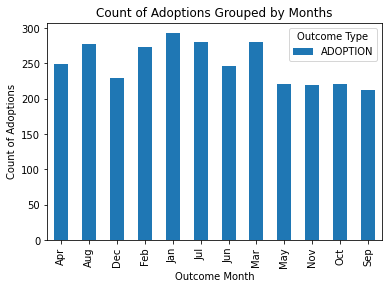

In [22]:
df_adoption = df[(df['Outcome Type'] == 'ADOPTION') & (df['Outcome Date'].dt.year < 2022)]
pd.crosstab(df_adoption['Outcome Month'], df_adoption['Outcome Type']).plot.bar()
plt.title('Count of Adoptions Grouped by Months')
plt.ylabel('Count of Adoptions');

In order to get an equal amount of months, these months range from Januaray 2014 to December 2021.

Generally, it seems more people are willing to adopt towards the beginning half of the year rather than the end half of the year.

December is surprising as its one of the months containing fewer dogs adopted and we initially assumed more dogs would be adopted for the major holidays like Christmas.

Though we see that there is a trend of adoption happening more towards the beginning of the year, the amount of all adoptions for all months are very similar so it seems that time does not have a large impact on adoption rates.

On the other end of adoption, how does month affect give up rates?

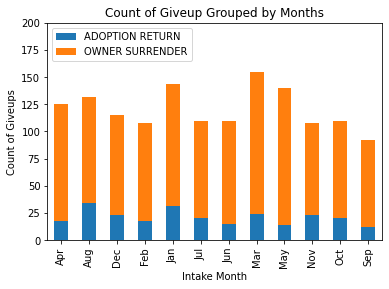

In [23]:
df_giveup = df[(df['Intake Type'].isin(['OWNER SURRENDER', 'ADOPTION RETURN'])) & (df['Outcome Date'].dt.year < 2022)]
pd.crosstab(df_giveup['Intake Month'], df_giveup['Intake Type']).plot.bar(stacked=True)
plt.legend(loc='upper left')
plt.ylim(0,200)
plt.title('Count of Giveup Grouped by Months')
plt.ylabel('Count of Giveups');

In order to get an equal amount of months, these months range from Januaray 2014 to December 2021.

As stated before, the term 'Give up' refers to when an owner willingly gives up the dog and this includes the values, 'ADOPTION RETURN' and 'OWNER SURRENDER'.

Generally, it seems more people are returning dogs towards the beginning half of the year and are returning them less towards the end half of the year.

Because there is more of a larger variance in the number of giveups for each of the months, it seems that time has a bigger impact on give ups than it does for adoption.

Both adoption and return rates are highest towards the beginning of the year. 

This is a bit surprising as we originally thought that it would be the opposite (adoption highest at the beginning of the year and return highest at the end of the year).

We've observed time's relation to adoption/give-up rates.
Now how does an animal's biological data (age, health, sex, size) affect their adoption/give-up rates?


How does age affect adoption rate?

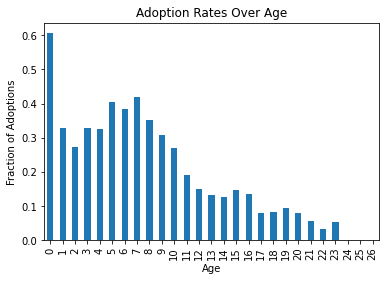

In [24]:
(df_adoption['Age'].value_counts() / df['Age'].value_counts()).round(3).plot.bar()
plt.title('Adoption Rates Over Age')
plt.ylabel('Fraction of Adoptions')
plt.xlabel('Age');

We use the same df_adoption set even though it doesn't include the year 2022 because the size of the df_adoption is the same regardless whether we include the year 2022 or not.

This graph tell us that how many dogs were adopted respective of their age group. For example, for all dogs in the shelter that were less than 1 year old, a whopping 60% of those dogs were adopted.

We also see that dogs that are well in into their middle ages (around 5-7 years old) are the next biggest group likely to be adopted. 

Generally, newborns have a much higher tendency to get adopted. Suprisngly, dogs who are past their newborn age but not yet reaching their middle ages (around 1-4 years) are adopted less than those in their middle ages (5-7 years).

This tells us that people would either prefer to have dogs in their newborn stage or into their mature middle age years.

We expected less people to adopt older dogs as we thought the mentality of people was that they intend and expect to take care of the dog they adopted for many years and this graph confirms that older elder dogs are adopted even less. Though there were dogs reported to be around 24-26 years told, there were no records of adoption for them.

How does age affect give-up rates?

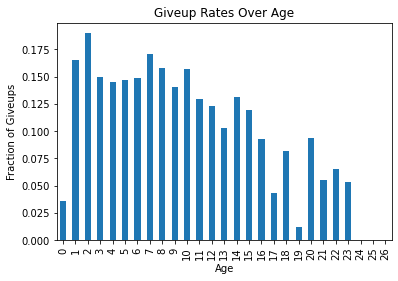

In [25]:
(df_giveup['Age'].value_counts() / df['Age'].value_counts()).round(3).plot.bar()
plt.title('Giveup Rates Over Age')
plt.ylabel('Fraction of Giveups')
plt.xlabel('Age');

As with df_adoption, we use the same df_giveup set even though it doesn't include the year 2022 because the size of the df_giveup is the same regardless whether we include the year 2022 or not.

This graph tell us how many dogs were given up respective of their age group. For example, for all dogs in the shelter that are 1 year old, around 17% of them were given up.

Originally, we thought that the more younger (newborn) or older the dog, that more give-ups would happen as we assumed based on experience that health is more rocky with those ages and we assumed that people would give up pets if they cannot take care of them anymore.

The graph shows us however, that newborns make up one of the smaller categories of the ones given up. With dogs around 17 or 19 years of age also making up the smaller categories.

Generally, it seems that out of all the give-ups (both owner surrender and adoption return), give-ups are highest at 1 year of age and overall decline as the dog gets older.


How does health affect adoption rates?

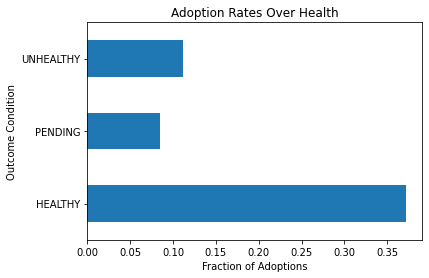

In [26]:
(df_adoption['Outcome Condition'].value_counts() / df['Outcome Condition'].value_counts()).round(3).dropna().plot.barh()
plt.title('Adoption Rates Over Health')
plt.ylabel('Outcome Condition')
plt.xlabel('Fraction of Adoptions');

This graph tell us how many dogs were adopted respective of their health on outcome. For example, for all dogs in the shelter that are healthy, around 37% of them were adopted.

As expected, people generally want to pick dogs that are in good condition to be adopted.

Surprisingly, known unhealthy dogs are adopted more than those whose health status is unknown. We predict this is because some people might be willingly choosing unhealthy dogs so that their last days are not spent in a shelter.

How does health affect give-up rates?

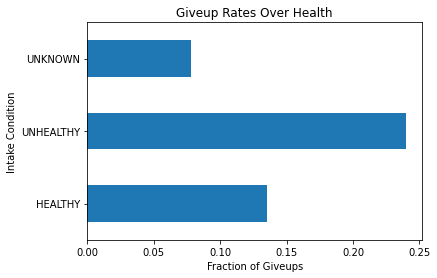

In [27]:
(df_giveup['Intake Condition'].value_counts() / df['Intake Condition'].value_counts()).round(3).dropna().plot.barh()
plt.title('Giveup Rates Over Health')
plt.ylabel('Intake Condition')
plt.xlabel('Fraction of Giveups');

This graph tell us how many dogs were given up respective of their health when taken in. For example, for all dogs in the shelter that came in healthy, around 14% of those were given up.

As expected, people generally give up dogs that are unhealthy. Surprsingly, more dogs that are known to be healthy are given up more than dogs whose health's status was a mystery at that moment.

This could be due to an underlying hidden factor like behavioral issues. Generally if a dog is in a good condition but is too much to handle behavior-wise, a person would give that dog up.

How does sex affect adoption rates?

In [28]:
(df_adoption['Sex'].value_counts() / df['Sex'].value_counts()).round(3).sort_values(ascending=False).dropna()

Spayed      0.438
Neutered    0.378
Male        0.002
Female      0.001
Name: Sex, dtype: float64

Out of all the dogs who are spayed, less then half of them get adopted.
Around 38% of those neutered get adopted, and a measly 0.02% and 0.01% are male and female resepectively.

Generally, it seems that most people will adopt spayed females over their neutered male counterparts.

It also makes sense that non-spayed females and non-males are so low as the shelter will most likely spay or neuter dogs taken in there.

How does sex affect give-up rates?

In [29]:
(df_giveup['Sex'].value_counts() / df['Sex'].value_counts()).round(3).sort_values(ascending=False).dropna()

Spayed      0.173
Neutered    0.163
Female      0.083
Male        0.068
Name: Sex, dtype: float64

Out of all the dogs who are spayed, around 17% of those dogs are given up.
Because the percentages of those spayed and neutered are so close, it seems that the fact that they are spayed/neutered does not matter too much in an owner's choice to give them up.

Surprinsly, non-spayed females and non-neutured are lower than spayed and neutered. It seems that owners tend to keep those non-neutered or non-spayed more. A situation that could explain this is the dogs having kids and the owner being unwilling to separate the kids from their parents.

Overall, it seems that non-neutered or non-spayed dogs are equally less likely to be given up than their spayed or neutered counterparts.



How does size affect adoption rates?

In [30]:
(df_adoption['Size'].value_counts() / df['Size'].value_counts()).round(3).sort_values(ascending=False)

PUPPY    0.623
TOY      0.405
SMALL    0.347
MED      0.242
LARGE    0.190
X-LRG    0.135
Name: Size, dtype: float64

Out of all the dogs who are puppy-sized, a whopping 62% of those get adopted. Followed by toy, then small, then medium, and large, and extra large.

Generally, it seems that the smaller the dog, the higher chance it has of being adopted.

This makes sense as bigger dogs (especially extra large ones) require a lot more care and definitely need more exercise (1+ hour walks, etc.) in order to stay healthy which a lot of people can't afford the time to do.

How does size affect give-up rates?

In [31]:
(df_giveup['Size'].value_counts() / df['Size'].value_counts()).round(3).sort_values(ascending=False)

PUPPY    0.301
TOY      0.166
LARGE    0.145
SMALL    0.118
MED      0.115
X-LRG    0.060
Name: Size, dtype: float64

Unfortunately puppy-sized dogs are the biggest category again out of all the dogs who are puppy-sized, about 30% of them are given up.

Surprisingly by a little margin, large dogs are given up more than small or medium dogs.

It seems that toy, large, small, and medium dogs have around the same chance to be given up. Puppy largely outclasses these categories and extra large dogs seem to have the best chance at not being given up once acquired.

Lastly, for the adoption/give-up rates, did COVID-19 have an effect?

How does COVID-19 affect adoption rates?

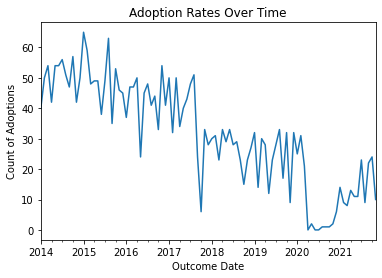

In [32]:
df['Outcome Dates'] = df['Outcome Date']
df.set_index('Outcome Date', inplace=True)
df.sort_index(inplace=True)
df[df['Outcome Type'] == 'ADOPTION'].resample('M').size().plot()
plt.title('Adoption Rates Over Time');
plt.ylabel('Count of Adoptions');

It seems that generally over time, adoption rates have decreased.

As we are more focused on COVID-19 affecting adoption rates, we will look at that section of time from its peak (March 2020) to now.

As each year is split into 4 month sections, there seems to be a very dramatic drop starting on March 2020 which had around 30 adoptions down to 1-4 adoptions during April 2020. This trend stays in this 1-4 range from April 2020 to Decemeber 2020.

As 2021 comes around, the amount of adoptions happening picks up again.

It is likely that many counties had shelter-in-place orders during the peak of the pandemic (2020) which caused the amount of adoptions to drop drastically until 2021 where mandates were beginning to be lifted.

How does COVID-19 affect give-up rates?

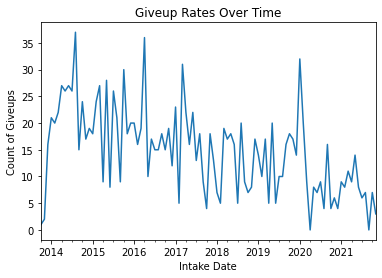

In [33]:
df.set_index('Intake Date', inplace=True)
df.sort_index(inplace=True)
df[(df['Intake Type'] == 'ADOPTION RETURN') | (df['Intake Type'] == 'OWNER SURRENDER')].resample('M').size().plot()
plt.title('Giveup Rates Over Time')
plt.ylabel('Count of Giveups');

It seems that generally over time, give up rates have decreased. There are up-spikes that tend to happen during the middle of any year.

As we are more focused on COVID-19 affecting giveups, we will look at that section of time from its peak (March 2020) to now.

As each year is split into 4 month sections, there seems to be a very dramatic drop starting on Janurary 2020 which had around 30 giveups down to 1-2 adoptions during the end of March 2020 (the peak) and the beginning of April 2020.

As 2020 goes on, the amount of giveups increases towards the summer of 2020. During the fall of 2020, we see a decrease before giveups pick up again during the begininng majority of 2021.


It is likely as more people were dealing with the after-effects of COVID at this time (a few months after the peak of COVID) that that those effects have left many people disabled and therefore unable to take care of their pets.

On to our second main question, 'what affect death rates'?
To start off, we focus on factors that could alter death rates?

For example, does biological data on intake affect death rates?

More specifically, how does age affect death rates?

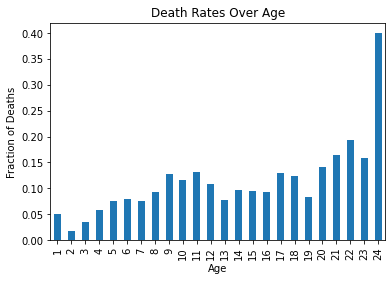

In [34]:
df_dead = df[(df['Outcome Type'] == 'EUTHANIZE') | (df['Outcome Type'] == 'DIED')]
(df_dead['Age'].value_counts() / df['Age'].value_counts()).round(3).dropna().plot.bar()
plt.title('Death Rates Over Age')
plt.ylabel('Fraction of Deaths')
plt.xlabel('Age');

To focus on death rates, we looked at values in the 'Outcome Type' column involving euthanization and death.

This graph tell us how many dogs died respective of their age. For example, for all dogs in the shelter that are 24 years, a whopping 40% of them die in the shelter or are euthanized.

As expected, dogs who are younger (around 1-4 years of age) have a lesser chance of being euthanized.


Generally, it seems that dogs around 8-19 years of age die at the shelter at the same rate. The more elderly (17-24 years of age) the dog, the higher chance it has to die at the shelter.

How does health on intake affect death rates?

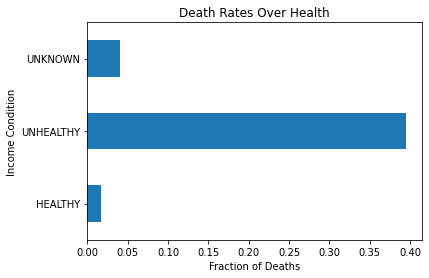

In [35]:
(df_dead['Intake Condition'].value_counts() / df['Intake Condition'].value_counts()).round(3).dropna().plot.barh()
plt.title('Death Rates Over Health')
plt.ylabel('Income Condition')
plt.xlabel('Fraction of Deaths');

This graph tell us how many dogs died respective of their income condition. For example, for all dogs in the shelter that that came in healthy, less than 3% died at the shelter.

As expected, it would seem that unhealthy dogs are being euthanized and dying more than their healthy and unknown counterparts. The fact that the fraction of dogs who died and whose health status coming in is unknown is greater than those healthy is expected as well. There are no surprises in this graph. 

Out of all deaths, what was the dog's duration of stay?

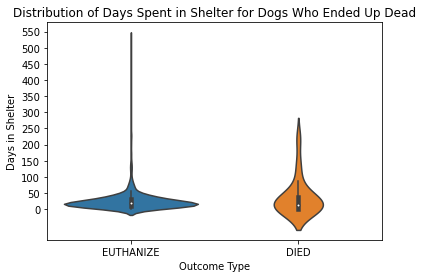

In [36]:
sns.violinplot(x='Outcome Type', y='Days in Shelter', data=df_dead)
plt.yticks(np.arange(0, 600, step=50))
plt.title('Distribution of Days Spent in Shelter for Dogs Who Ended Up Dead');

For both euthanizations and those who died without euthanizing, their median for days spent in the shelter are around 25 days. Both 50% of their data lies around the 25-50 day range. 

Dogs who end up euthanized have a much larger chance to stay for around 25-50 days in the shelter, but dogs who are euthanized also have a slim possibility of staying in the shelter for more than 150 days and up to more than 550 days.

Dogs who died not to euthanization also have a bigger chance of staying around 25-50 days. They also have a bigger thance than those euthanized to stay around 100-275 days, however there is no chance for a dog whose died not to euthanization to stay more than 300 days.

Did COVID-19 increase the amount of ‘unhealthy’ dogs?

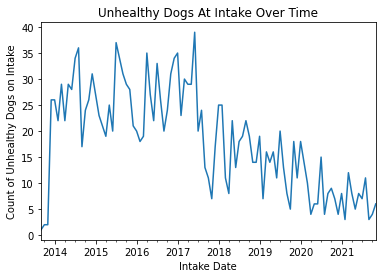

In [37]:
df[(df['Intake Condition'] == 'UNHEALTHY')].resample('M').size().plot()
plt.title('Unhealthy Dogs At Intake Over Time')
plt.ylabel('Count of Unhealthy Dogs on Intake');

It seems that generally over time, the amount of unhealthy dogs being taken in  have decreased.

As we are more focused on COVID-19 affecting the amount of unhealthy dogs being taken in, we will look at that section of time from its peak (March 2020) to now.

As each year is split into 4 month sections, there seems to be a steep increase starting on March 2020 which hits its peak of around 15 unhealthy dogs being taken in during the summer of 2020.

After the summer, there is a general decrease of unhealthy dogs being taken in but up-spikes towards the beginning and fall of 2021.

It is likely that dogs did start catching COVID around the peak hence the increase of unhealthy dogs starting to happnening around that time. The decrease after could be explained that enough dogs got COVID to the point where they became resistant and they developed herd immunity.

Does adoption rates have an affect on death?

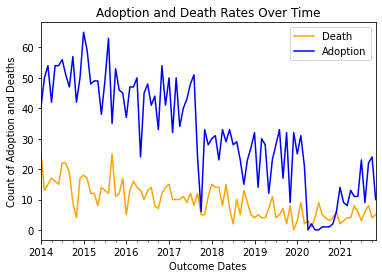

In [38]:
df.set_index('Outcome Dates', inplace=True)
df.sort_index(inplace=True)
df[(df['Outcome Type'] == 'EUTHANIZE') | (df['Outcome Type'] == 'DIED')].resample('M').size().plot(color='orange', label='Death')
df[(df['Outcome Type'] == 'ADOPTION')].resample('M').size().plot(color='blue', label='Adoption');
plt.legend(['Death', 'Adoption'])
plt.title('Adoption and Death Rates Over Time')
plt.ylabel('Count of Adoption and Deaths');

Generally, it seems that adoption rates follow death rates (as one increases, the other increases and vice versa).

There are few choice cases where the opossite occurs. For example, around the start of 2016, there was a sharp decrease in adoption while the deaths were experiencing a slight increase. And the same happening again in the the middle of 2019.

Most notable, is around 2020 where the amount of adoptions decreased so steeply that it dropped even lower than the amount of deaths during that time. As stated before, this is most likely due to COVID's shelter-in-place which required people to not to go out of their homes if necessary and therefore drastically reduced outgoings altogether.

# Conclusion

From this data visualization, we observe that time does not have a big impact on adoptions, but that time does slightly impact give-ups in that more people will give up a dog during the start of the year. According to our findings with biological data, people tend to adopt newborns or middle-aged (5-7 years) dogs who are healthy and spayed and are smaller in stature. And that people tend to give-up (irrespective of sex since that did not have much of an impact), dogs who are non-newborn and non-elderly, unhealthy, and puppy-sized. In terms of COVID-19, adoptions drastically reduced during that time while give-ups increased slightly. For death rates, elderly unhealthy dogs tend to die more. We also observed that dogs who ended up dying stayed at the shelter for around 25-20 days, that COVID-19 did increase the amount of unhealthy dogs, and that generally as adoption rates increase/decrease so does death rates. All in all, from this date, the Sonoma Animal County Shelter should allocate and provide more resources to unhealthy older dogs as they have a higher chance to die and a lesser of chance of being adopted.